# Problemas com a Prática meanshift

## Imports

In [ ]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


## Análise

Text(0.5, 1.0, '(460, 750, 3)')

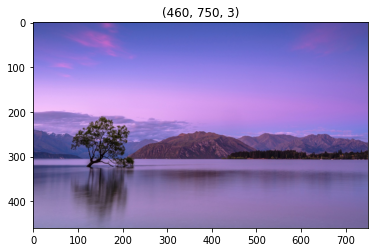

In [ ]:
img2 = Image.open('/content/o-que-e-paisagem.jpeg')

img = np.array(img2)

# saving the image shape
shape = img.shape

# reshaping image 
reshape_img = np.reshape(img, [-1, 3])

#plotting the image
plt.imshow(img)
plt.title(img.shape)

In [ ]:
img[:, :, 0]

array([[ 68,  67,  68, ...,  74,  74,  74],
       [ 70,  70,  71, ...,  75,  75,  75],
       [ 72,  72,  72, ...,  75,  75,  75],
       ...,
       [139, 139, 139, ..., 112, 112, 112],
       [139, 139, 140, ..., 110, 111, 110],
       [140, 141, 141, ..., 109, 110, 109]], dtype=uint8)

In [ ]:
img[:, :, 1]

array([[ 83,  82,  83, ...,  76,  76,  76],
       [ 82,  82,  83, ...,  77,  77,  77],
       [ 83,  83,  83, ...,  77,  77,  77],
       ...,
       [136, 136, 135, ..., 102, 102, 102],
       [136, 136, 136, ..., 100, 101, 100],
       [137, 138, 137, ...,  99, 100,  99]], dtype=uint8)

In [ ]:
img[:, :, 2]

array([[164, 163, 164, ..., 159, 161, 161],
       [164, 164, 165, ..., 160, 162, 162],
       [165, 165, 165, ..., 160, 160, 162],
       ...,
       [183, 183, 185, ..., 154, 154, 154],
       [183, 183, 186, ..., 152, 153, 150],
       [182, 185, 187, ..., 151, 152, 149]], dtype=uint8)

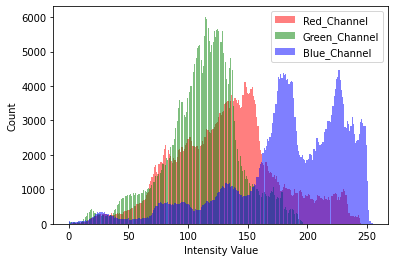

In [ ]:
#_ = plt.hist(img.ravel(), bins = 256, color = 'orange', )
_ = plt.hist(img[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
_ = plt.hist(img[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
_ = plt.hist(img[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
_ = plt.legend([ 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
plt.show()


In [ ]:
img

array([[[ 68,  83, 164],
        [ 67,  82, 163],
        [ 68,  83, 164],
        ...,
        [ 74,  76, 159],
        [ 74,  76, 161],
        [ 74,  76, 161]],

       [[ 70,  82, 164],
        [ 70,  82, 164],
        [ 71,  83, 165],
        ...,
        [ 75,  77, 160],
        [ 75,  77, 162],
        [ 75,  77, 162]],

       [[ 72,  83, 165],
        [ 72,  83, 165],
        [ 72,  83, 165],
        ...,
        [ 75,  77, 160],
        [ 75,  77, 160],
        [ 75,  77, 162]],

       ...,

       [[139, 136, 183],
        [139, 136, 183],
        [139, 135, 185],
        ...,
        [112, 102, 154],
        [112, 102, 154],
        [112, 102, 154]],

       [[139, 136, 183],
        [139, 136, 183],
        [140, 136, 186],
        ...,
        [110, 100, 152],
        [111, 101, 153],
        [110, 100, 150]],

       [[140, 137, 182],
        [141, 138, 185],
        [141, 137, 187],
        ...,
        [109,  99, 151],
        [110, 100, 152],
        [109,  99, 149]]

In [ ]:
img.shape

(460, 750, 3)

In [ ]:
img[3]

array([[ 72,  83, 165],
       [ 72,  83, 165],
       [ 72,  83, 165],
       ...,
       [ 77,  78, 161],
       [ 76,  78, 161],
       [ 75,  77, 160]], dtype=uint8)

In [ ]:
reshape_img.shape

(345000, 3)

In [ ]:
bandwidth = estimate_bandwidth(reshape_img, quantile=0.1, n_samples=100)
bandwidth

25.14586351803599

In [ ]:
msc = MeanShift(bandwidth=bandwidth, bin_seeding=True)
msc.fit(reshape_img)

MeanShift(bandwidth=25.14586351803599, bin_seeding=True, cluster_all=True,
          max_iter=300, min_bin_freq=1, n_jobs=None, seeds=None)

In [ ]:
labels = msc.labels_
result_image = np.reshape(labels, shape[:2])

In [ ]:
len(msc.predict(reshape_img))

345000

In [ ]:
msc.cluster_centers_

array([[141.58059555, 120.36316231, 178.65490004],
       [156.38020679, 129.59747251, 224.07392089],
       [ 89.31903051,  95.01491529, 186.78053987],
       [217.61638167, 167.60728508, 244.49672054],
       [104.69995704,  87.83619107, 136.69675429],
       [ 77.54364731,  56.88538779,  84.76529853],
       [ 32.00182454,  23.71400334,  27.89220009],
       [106.5       ,  72.5       ,  13.        ],
       [196.        , 151.        ,  92.        ],
       [172.        , 125.        ,  71.        ]])

In [ ]:
msc.cluster_centers_.shape

(10, 3)

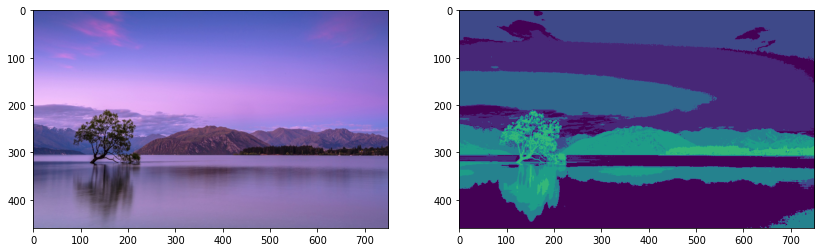

In [ ]:
fig = plt.figure(2, figsize=(14, 12))
ax = fig.add_subplot(121)
ax = plt.imshow(img) 
ax = fig.add_subplot(122)
ax = plt.imshow(result_image)  
plt.show()

In [ ]:
value, counts = np.unique(result_image, return_counts=True)

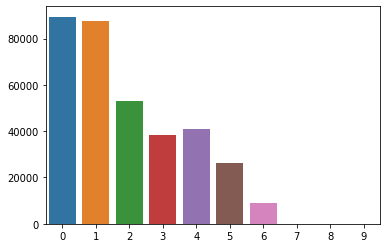

In [ ]:
import seaborn as sns
sns.barplot(x = value, y= counts)

In [ ]:
value

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
counts

array([89409, 87548, 53114, 38235, 41095, 26439,  9106,    48,     1,
           5])

In [ ]:
img